#  Advanced algo prediction from bettings odds of all 4 companies and team attributes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import mean, std
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df = pd.read_csv('../data/matches_with_team_attributes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15981 entries, 0 to 15980
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_match                  15981 non-null  int64  
 1   date_match                15981 non-null  object 
 2   season_name               15981 non-null  object 
 3   home_team_api_id          15981 non-null  int64  
 4   away_team_api_id          15981 non-null  int64  
 5   win_lose_draw             15981 non-null  object 
 6   B365H                     15981 non-null  float64
 7   B365D                     15981 non-null  float64
 8   B365A                     15981 non-null  float64
 9   BWH                       15981 non-null  float64
 10  BWD                       15981 non-null  float64
 11  BWA                       15981 non-null  float64
 12  IWH                       15981 non-null  float64
 13  IWD                       15981 non-null  float64
 14  IWA   

## Prepare data and try different shallow models

In [3]:
feature_cols = list(
    set(df.columns.tolist()) - 
    {'id', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'win_lose_draw', 'season_name', 'date_match', 'id_match'}
    )
target_label = 'win_lose_draw'

X = df[feature_cols]
y = df[target_label]

print(feature_cols)

['chanceCreationPassing_H', 'buildUpPlayPassing_H', 'BWD', 'IWD', 'BWH', 'B365H', 'chanceCreationCrossing_A', 'defencePressure_A', 'buildUpPlaySpeed_H', 'LBD', 'defenceTeamWidth_H', 'buildUpPlaySpeed_A', 'B365D', 'defenceAggression_A', 'B365A', 'LBA', 'buildUpPlayPassing_A', 'defencePressure_H', 'chanceCreationShooting_H', 'chanceCreationShooting_A', 'chanceCreationCrossing_H', 'IWA', 'BWA', 'chanceCreationPassing_A', 'defenceTeamWidth_A', 'LBH', 'defenceAggression_H', 'IWH']


In [4]:
X.describe()

,chanceCreationPassing_H,buildUpPlayPassing_H,BWD,IWD,BWH,B365H,chanceCreationCrossing_A,defencePressure_A,buildUpPlaySpeed_H,LBD,...,chanceCreationShooting_H,chanceCreationShooting_A,chanceCreationCrossing_H,IWA,BWA,chanceCreationPassing_A,defenceTeamWidth_A,LBH,defenceAggression_H,IWH
count,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,...,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000
mean,52.540767,47.857018,3.788491,3.644077,2.589340,2.661016,54.303986,46.339466,52.906139,3.756980,...,54.111883,54.102246,54.308867,4.176535,4.447862,52.531944,52.182154,2.571997,49.787373,2.494318
std,10.695661,11.373729,1.085841,0.834628,1.696014,1.869645,11.047534,10.466065,11.985586,1.065367,...,10.593927,10.597839,11.043677,2.945059,3.433770,10.702289,9.865081,1.716123,10.005679,1.500662
min,21.000000,20.000000,1.650000,1.500000,1.030000,1.040000,20.000000,23.000000,20.000000,1.440000,...,22.000000,22.000000,20.000000,1.100000,1.100000,21.000000,30.000000,1.040000,24.000000,1.050000
25%,47.000000,39.000000,3.250000,3.200000,1.650000,1.670000,48.000000,39.000000,45.000000,3.250000,...,48.000000,48.000000,48.000000,2.500000,2.500000,47.000000,47.000000,1.660000,44.000000,1.650000
50%,52.000000,49.000000,3.400000,3.300000,2.100000,2.100000,54.000000,46.000000,53.000000,3.400000,...,54.000000,54.000000,54.000000,3.300000,3.400000,52.000000,52.000000,2.100000,49.000000,2.100000
75%,60.000000,55.000000,3.900000,3.700000,2.750000,2.800000,63.000000,53.000000,63.000000,3.750000,...,62.000000,62.000000,63.000000,4.650000,5.000000,60.000000,59.000000,2.750000,57.000000,2.600000
max,80.000000,80.000000,19.500000,11.000000,34.000000,26.000000,80.000000,72.000000,80.000000,19.000000,...,80.000000,80.000000,80.000000,25.000000,51.000000,80.000000,73.000000,26.000000,72.000000,20.000000


<AxesSubplot:>

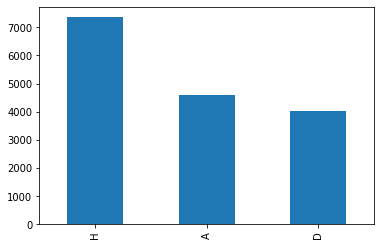

In [5]:
y.value_counts().plot(kind='bar')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## LightGBM

In [8]:
import lightgbm as lgb

In [9]:
clf = lgb.LGBMClassifier(random_state=42).fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of classifier on training set: 0.70
Accuracy of  classifier on test set: 0.53


In [10]:
scores = cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.520 (0.012)


## XGBoost

In [11]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42).fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of  classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

[21:11:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of classifier on training set: 0.86
Accuracy of  classifier on test set: 0.50


In [12]:
scores = cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[21:11:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

## AutoML

In [19]:
from autoPyTorch.api.tabular_classification import TabularClassificationTask

# initialise Auto-PyTorch api
api = TabularClassificationTask()

# Search for an ensemble of machine learning algorithms
api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    optimize_metric='accuracy',
    total_walltime_limit=3000,
    func_eval_time_limit_secs=500
)

# Calculate test accuracy
y_pred = api.predict(X_test)
score = api.score(y_pred, y_test)
print("Accuracy score", score)

[WARNING] [2022-02-22 21:27:55,284:Client-Validation] AutoPyTorch previously received features of type <class 'numpy.ndarray'> yet the current features have type <class 'pandas.core.frame.DataFrame'>. Changing the dtype of inputs to an estimator might cause problems
[WARNING] [2022-02-22 21:27:55,346:Client-Validation] AutoPyTorch previously received features of type <class 'numpy.ndarray'> yet the current features have type <class 'pandas.core.frame.DataFrame'>. Changing the dtype of inputs to an estimator might cause problems
[ERROR] [2022-02-22 21:36:18,311:Client-AutoPyTorch:88c08954-9415-11ec-8a11-1e00d1011f4a:1] Traditional prediction for lgb failed with run state StatusType.TIMEOUT.
Additional info:
error: Timeout
configuration_origin: traditional
Accuracy score {'accuracy': 0.5411323115420706}


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 461    0  475]
 [ 207    0  584]
 [ 201    0 1269]]
              precision    recall  f1-score   support

           A       0.53      0.49      0.51       936
           D       0.00      0.00      0.00       791
           H       0.55      0.86      0.67      1470

    accuracy                           0.54      3197
   macro avg       0.36      0.45      0.39      3197
weighted avg       0.41      0.54      0.46      3197



# Conclusion
After a lot of algo research and tuning, autoML with pytorch is the best algo for this competition. The margin is small, just 0.01 and no cross validation is performed.

After interpreting the confusion matrix and taking into account the fact that the target is imbalanced, it seems that no model is particularly good for this competition.